## Tugas 1

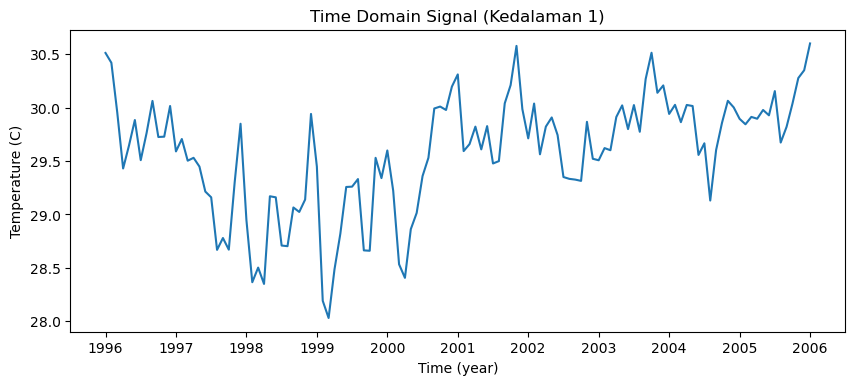

In [8]:
# Author(s) :
# Salbi Faza Rinaldi (12917009)
# Revision history
# 2020-09-12
# ===============================

import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt

angin = np.loadtxt('T(z)_1.txt', dtype=None)
n = np.size(angin)

Ts = 30
Fs = 1 / Ts
dt = np.arange(1, n * Ts, Ts)

x1= np.arange(1, 3960, 360)
xlabels1 = np.arange(1996, 2007, 1)

fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.plot(dt, angin)
ax.set_title('Time Domain Signal (Kedalaman 1)')
ax.set_xlabel('Time (year)')
ax.set_ylabel('Temperature (C)')
plt.xticks(x1, xlabels1)
plt.show()

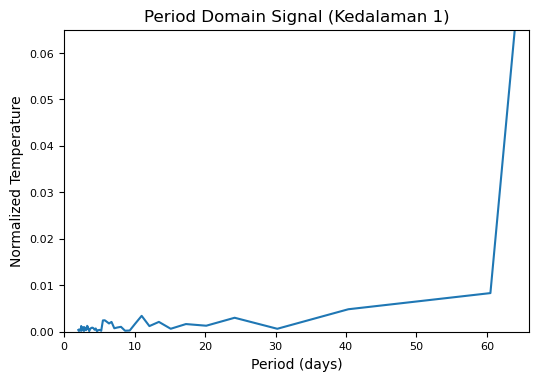

In [9]:
fft_angin = fft(angin,n)
fff_angin = fft_angin[0:int(n/2)]
fff_angin = fff_angin/fft_angin.max()
xfft = Fs*np.arange(1,n/2)/n
pfft = (1./xfft)/Ts

fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(pfft,abs(fff_angin))
ax.set_title('Period Domain Signal (Kedalaman 1)')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Normalized Temperature')
ax.set(xlim=(0,66),ylim=(0,0.065))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

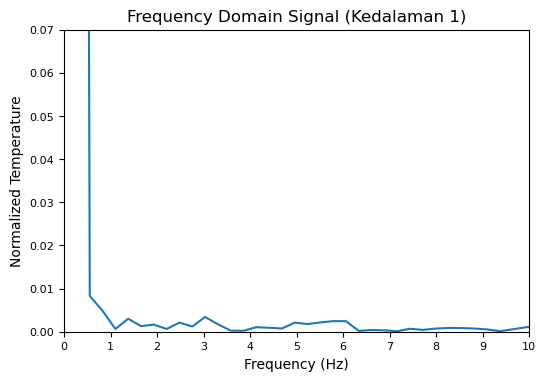

In [10]:
x2 = np.arange(0,0.011,0.001)
xlabels2 = np.arange(0,11,1)
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(xfft,abs(fff_angin))
ax.set_title('Frequency Domain Signal (Kedalaman 1)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Temperature')
ax.set(xlim=(0,0.01),ylim=(0,0.07))
plt.xticks(x2,xlabels2, fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Tes.png', dpi=900)
plt.show()

# Tugas 2

### Script Depth-Time

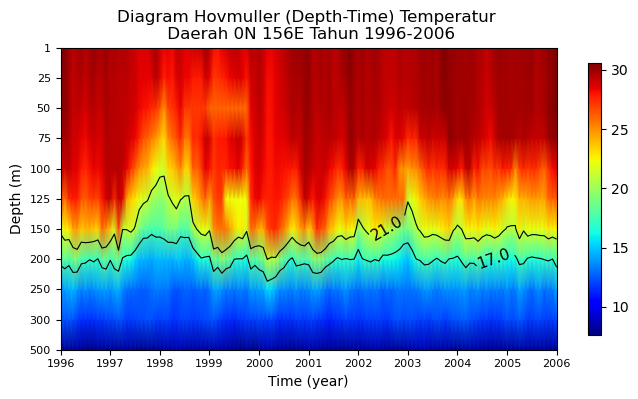

In [12]:
import numpy as np
import matplotlib.pyplot as plt

St = np.loadtxt('Hovmuller.txt')
Depth = np.loadtxt('Depth.txt')
Time = np.loadtxt('Time.txt')

Temp = St.reshape(11,121)
Temp2 = np.flipud(Temp)
# Temp2 = np.fliplr(Temp2)

fig, ax = plt.subplots(figsize=(8,4),dpi=100)
im = ax.pcolormesh(Temp2, shading='gouraud',cmap='jet')
cs = plt.contour(Temp2, [17,21], colors='k',linewidths=.8)

y1 = np.arange(0,11,1)
x1 = np.arange(0,121,12)
y1label = [500,300,250,200,150, 125, 100, 75, 50, 25, 1]
x1label = np.arange(1996,2007,1)

fig.colorbar(im,ax=ax, shrink = .9)

ax.set_title('Diagram Hovmuller (Depth-Time) Temperatur \n Daerah 0N 156E Tahun 1996-2006')
ax.set_xlabel('Time (year)')
ax.set_ylabel('Depth (m)')
plt.xticks(x1,x1label,fontsize=8)
plt.yticks(y1,y1label,fontsize=8)
plt.clabel(cs, fmt = '%2.1f', fontsize=11)
# plt.savefig('Tes.png', dpi=900)
plt.show()

### Script Low-Pass-Filter

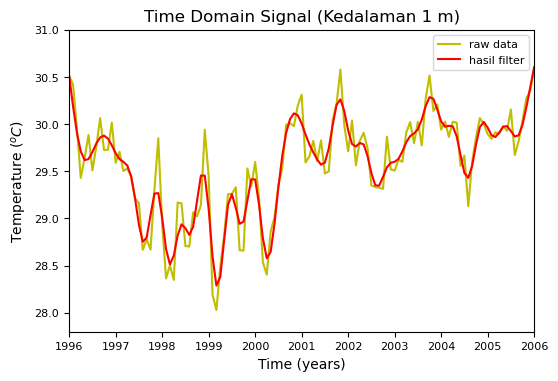

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

data = np.loadtxt('T(z)_1.txt')

Ts = 3600 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*6)  # Frekuensi cut-off = 6 jam, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
elevasi_filter = signal.filtfilt(b, a, data) # implementasi filter ke data

x = np.arange(0,121,12)
xlabel = np.arange(1996,2007,1)
fig, ax = plt.subplots(dpi=100)
ax.plot(data,color = 'y', label='raw data')
ax.plot(elevasi_filter,color = 'r', label='hasil filter')
ax.legend(loc='best',fontsize=8)
ax.set(xlim=(0,120),ylim=(27.8,31))
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature $(^oC)$')
ax.set_title('Time Domain Signal (Kedalaman 1 m)')
plt.xticks(x,xlabel, fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('Tes.png', dpi=900)
plt.show()

## Tugas 3